In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings; warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.examples.tutorials import mnist

## Load Datasets

In [3]:
mnist_data = mnist.input_data.read_data_sets('./datasets/mnist/', one_hot=True, seed=90)

## Create Interactive Session

In [4]:
sess = tf.InteractiveSession()

## Set Configs

In [5]:
learning_rate = 0.01
num_epochs = 50
batch_size = 256
num_visible = 784 # 28x28 data input
num_hidden_l1 = 256
num_hidden_l2 = 128

## Define Layers

In [6]:
X = tf.placeholder(tf.float32, [None, num_visible])

In [7]:
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_visible, num_hidden_l1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_l1, num_hidden_l2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_l2, num_hidden_l1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_l1, num_visible])),
}

In [8]:
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_l1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_l2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_l1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_visible])),
}

## Define Network

In [9]:
# building the encoder
def encoder(x):
    
    # encoder first and second layers with sigmoid activation
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))    
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    
    return layer_2

In [10]:
# building the decoder
def decoder(x):
    
    # decoder first and second layers with sigmoid activation
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    
    return layer_2

In [11]:
# construct autoencoder model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

## Set Loss Function

In [12]:
y_pred = decoder_op # reconstructed images
y_true = X # input data as labels

In [13]:
loss_op = tf.reduce_mean(tf.pow(y_true - y_pred, 2))

## Set Optimizer

In [14]:
optimizer_op = tf.train.RMSPropOptimizer(learning_rate).minimize(loss_op)

## Train The Graph

Epoch: 1, Reconstruction Loss: 0.209556654
Epoch: 2, Reconstruction Loss: 0.176989421
Epoch: 3, Reconstruction Loss: 0.163859874
Epoch: 4, Reconstruction Loss: 0.147452429
Epoch: 5, Reconstruction Loss: 0.143175155
Epoch: 6, Reconstruction Loss: 0.139824003
Epoch: 7, Reconstruction Loss: 0.134199008
Epoch: 8, Reconstruction Loss: 0.131255195
Epoch: 9, Reconstruction Loss: 0.125880986
Epoch: 10, Reconstruction Loss: 0.126320511
Epoch: 11, Reconstruction Loss: 0.120609924
Epoch: 12, Reconstruction Loss: 0.118785165
Epoch: 13, Reconstruction Loss: 0.117665038
Epoch: 14, Reconstruction Loss: 0.115327798
Epoch: 15, Reconstruction Loss: 0.113939308
Epoch: 16, Reconstruction Loss: 0.115394965
Epoch: 17, Reconstruction Loss: 0.110137649
Epoch: 18, Reconstruction Loss: 0.114111431
Epoch: 19, Reconstruction Loss: 0.110183559
Epoch: 20, Reconstruction Loss: 0.107372828
Epoch: 21, Reconstruction Loss: 0.107174173
Epoch: 22, Reconstruction Loss: 0.105449095
Epoch: 23, Reconstruction Loss: 0.1033759

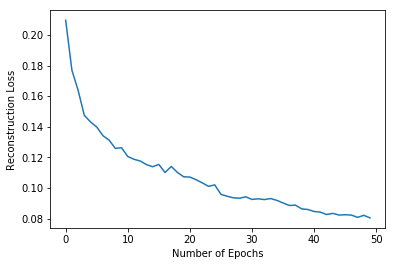

In [15]:
with tf.Session() as sess:

    init_op = tf.global_variables_initializer()
    
    sess.run(init_op) # run the init_op using an interactive session
    
    total_batch = int(mnist_data.train.num_examples / batch_size)
    losses = []
    
    for i_epoch in range(1, num_epochs+1):
        
        for i in range(total_batch):
            
            train_data, train_label = mnist_data.train.next_batch(batch_size)
            _, loss = sess.run([optimizer_op, loss_op], feed_dict={X: train_data})
        
        losses.append(loss)
        print(f'Epoch: {i_epoch}, Reconstruction Loss: {loss:.9f}')
        
    plt.plot(losses)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Reconstruction Loss')
    plt.show()
    
    # applying encode and decode over test set for 10 images
    encode_decode = sess.run(y_pred, feed_dict={ X: mnist_data.test.images[:10] })
    

## Visualize The Reconstructions

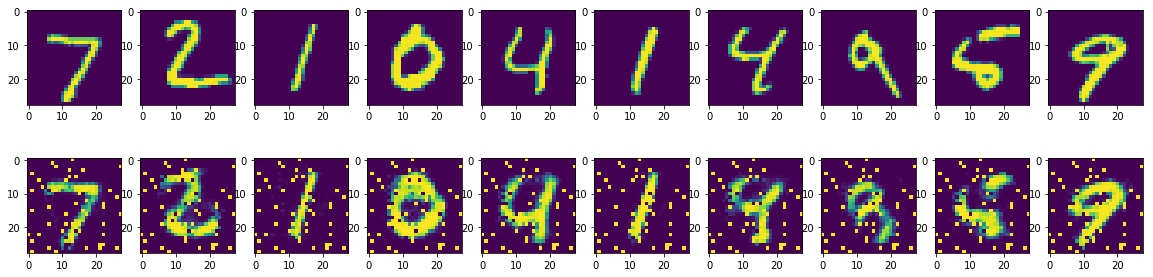

In [16]:
# comparing original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(20, 5))
for i in range(10):
    a[0][i].imshow(np.reshape(mnist_data.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))

plt.show()

---